In [1]:
from json import loads
import pandas as pd
from datetime import datetime
import sys
import os

In [2]:

script_path = os.path.abspath("../")
sys.path.append(script_path)

from utils import generic_bar_graph

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [4]:
%load_ext autoreload
%autoreload 2

# Carregando e configurando o dataset

In [195]:
df = pd.read_csv('../csv_datasets/data_from_all_players_tournaments_seasons_dataset.csv')

In [6]:
df.head()

,Unnamed: 0,positive,negative,positions,player,points,matches,statistics,team,season,tournament
0,0,[],[],"['MR', 'RW']","{'name': 'Manuel Feil', 'slug': 'manuel-feil',...","[{'x': 30, 'y': 10, 'count': 1}, {'x': 30, 'y'...",34.0,"{'rating': 6.7617647058824, 'totalRating': 229...","{'name': 'SV 07 Elversberg', 'slug': 'sv-07-el...",23_24,2_bundesliga
1,1,[],[],[],"{'name': 'Marco Pledl', 'slug': 'marco-pledl',...","[{'x': 72, 'y': 7, 'count': 1}, {'x': 72, 'y':...",1.0,"{'rating': 6.5, 'totalRating': 6.5, 'countRati...","{'name': 'SC Paderborn 07', 'slug': 'sc-paderb...",23_24,2_bundesliga
2,2,"[{'type': 25, 'rank': 271}, {'type': 15, 'rank...",[],"['DC', 'MC', 'DM']","{'name': 'Carlo Sickinger', 'slug': 'carlo-sic...","[{'x': 28, 'y': 51, 'count': 2}, {'x': 28, 'y'...",25.0,"{'rating': 6.94, 'totalRating': 173.5, 'countR...","{'name': 'SV 07 Elversberg', 'slug': 'sv-07-el...",23_24,2_bundesliga
3,3,"[{'type': 25, 'rank': 595}, {'type': 16, 'rank...","[{'type': 6, 'rank': 388}, {'type': 15, 'rank'...",['ST'],"{'name': 'Terrence Boyd', 'firstName': '', 'la...","[{'x': 73, 'y': 32, 'count': 1}, {'x': 73, 'y'...",15.0,"{'rating': 6.8, 'totalRating': 102, 'countRati...","{'name': '1. FC Kaiserslautern', 'slug': '1-fc...",23_24,2_bundesliga
4,4,[],[],['DC'],"{'name': 'Andi Hoti', 'firstName': '', 'lastNa...","[{'x': 18, 'y': 28, 'count': 1}, {'x': 18, 'y'...",18.0,"{'rating': 6.66875, 'totalRating': 106.7, 'cou...","{'name': '1. FC Magdeburg', 'slug': '1-fc-magd...",23_24,2_bundesliga


## Removendo colunas desnecessárias

In [196]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Renomeando colunas

In [197]:
df.rename(columns={'points': 'heatmap'}, inplace=True)

## Extraindo dados dos jogadores para o Dataset

Colunas úteis:

- Name - Nome
- Position - Posição
- height - Altura
- preferredFoot - Pé preferido do jogador
- proposedMarketValue - Valor de mercado
- contractUntilTimestamp - Data de vencimento do contrato
- team.shortName - Time que o jogador está atualmente
- team.tournament.name - Liga do time atual do jogador
- team.tournament.category.name - Tipo do torneio
- team.tournament.category.country.name	- Pais da liga do time atual do jogador

In [198]:
df['player'] = df['player'].apply(eval)

In [199]:
df_players = pd.json_normalize(df['player'])

In [200]:
df = pd.concat([df, df_players], axis=1)

In [188]:
df.head(1)

,positive,negative,positions,player,heatmap,matches,statistics,team,season,tournament,name,slug,shortName,position,jerseyNumber,height,preferredFoot,userCount,gender,id,shirtNumber,dateOfBirthTimestamp,contractUntilTimestamp,proposedMarketValue,team.name,team.slug,team.shortName,team.gender,team.sport.name,team.sport.slug,team.sport.id,team.tournament.name,team.tournament.slug,team.tournament.category.name,team.tournament.category.slug,team.tournament.category.sport.name,team.tournament.category.sport.slug,team.tournament.category.sport.id,team.tournament.category.id,team.tournament.category.country.alpha2,team.tournament.category.country.alpha3,team.tournament.category.country.name,team.tournament.category.country.slug,team.tournament.category.flag,team.tournament.category.alpha2,team.tournament.uniqueTournament.name,team.tournament.uniqueTournament.slug,team.tournament.uniqueTournament.primaryColorHex,team.tournament.uniqueTournament.secondaryColorHex,team.tournament.uniqueTournament.category.name,team.tournament.uniqueTournament.category.slug,team.tournament.uniqueTournament.category.sport.name,team.tournament.uniqueTournament.category.sport.slug,team.tournament.uniqueTournament.category.sport.id,team.tournament.uniqueTournament.category.id,team.tournament.uniqueTournament.category.country.alpha2,team.tournament.uniqueTournament.category.country.alpha3,team.tournament.uniqueTournament.category.country.name,team.tournament.uniqueTournament.category.country.slug,team.tournament.uniqueTournament.category.flag,team.tournament.uniqueTournament.category.alpha2,team.tournament.uniqueTournament.userCount,team.tournament.uniqueTournament.id,team.tournament.uniqueTournament.displayInverseHomeAwayTeams,team.tournament.priority,team.tournament.isLive,team.tournament.id,team.primaryUniqueTournament.name,team.primaryUniqueTournament.slug,team.primaryUniqueTournament.primaryColorHex,team.primaryUniqueTournament.secondaryColorHex,team.primaryUniqueTournament.category.name,team.primaryUniqueTournament.category.slug,team.primaryUniqueTournament.category.sport.name,team.primaryUniqueTournament.category.sport.slug,team.primaryUniqueTournament.category.sport.id,team.primaryUniqueTournament.category.id,team.primaryUniqueTournament.category.country.alpha2,team.primaryUniqueTournament.category.country.alpha3,team.primaryUniqueTournament.category.country.name,team.primaryUniqueTournament.category.country.slug,team.primaryUniqueTournament.category.flag,team.primaryUniqueTournament.category.alpha2,team.primaryUniqueTournament.userCount,team.primaryUniqueTournament.id,team.primaryUniqueTournament.displayInverseHomeAwayTeams,team.userCount,team.nameCode,team.disabled,team.national,team.type,team.id,team.country.alpha2,team.country.alpha3,team.country.name,team.country.slug,team.entityType,team.teamColors.primary,team.teamColors.secondary,team.teamColors.text,team.fieldTranslations.nameTranslation.ru,team.fieldTranslations.nameTranslation.hi,country.alpha2,country.alpha3,country.name,country.slug,proposedMarketValueRaw.value,proposedMarketValueRaw.currency,retired,deceased,firstName,lastName,team.fieldTranslations.nameTranslation.ar,fieldTranslations.nameTranslation.ar,fieldTranslations.nameTranslation.hi,fieldTranslations.nameTranslation.bn,fieldTranslations.shortNameTranslation.ar,fieldTranslations.shortNameTranslation.hi,fieldTranslations.shortNameTranslation.bn,team.fieldTranslations.nameTranslation.bn,team.fieldTranslations.shortNameTranslation.ar,team.fieldTranslations.shortNameTranslation.hi,team.fieldTranslations.shortNameTranslation.bn,dateOfDeathTimestamp,team.tournament.roundPrefix,team.ranking,createdByEditor,managerId
0,[],[],"['MR', 'RW']","{'name': 'Manuel Feil', 'slug': 'manuel-feil',...","[{'x': 30, 'y': 10, 'count': 1}, {'x': 30, 'y'...",34.0,"{'rating': 6.7617647058824, 'totalRating': 229...","{'name': 'SV 07 Elversberg', 'slug': 'sv-07-el...",23_24,2_bundesliga,Manuel Feil,manuel-feil,M. Feil,M,7,169.0,Right,16,M,814221,7.0,781574400

In [201]:
df = df[
    [
        'positive',
        'negative',
        'positions',
        'heatmap',
        'matches',
        'statistics',
        'team',
        'season',
        'tournament',
        'name',
        'position',
        'height',
        'preferredFoot',
        'proposedMarketValue',
        'contractUntilTimestamp',
        'team.shortName',
        'team.tournament.name',
        'team.tournament.category.name',
        'team.tournament.category.country.name',
        'id',
        'retired',
        'dateOfBirthTimestamp',
        'deceased'
    ]
].copy()

In [202]:
df.rename(columns={'team.shortName': 'current_team',
                   'team.tournament.name': 'current_team_tournament', 
                   'team.tournament.category.name': 'current_team_tournament_category',
                   'team.tournament.category.country.name': 'current_team_country',
                   'id': 'player_id'}, inplace=True)

## Extraindo dados dos times da temporada do jogador

In [203]:
df['team'] = df['team'].apply(eval)

In [204]:
df_team = pd.json_normalize(df['team'])

In [206]:
df_team.rename(columns={'name': 'season_team',
                   'shortName': 'season_team_shortname', }, inplace=True)

In [207]:
df = pd.concat([df, df_team], axis=1)

In [209]:
df = df.iloc[:, :26]

In [210]:
df.head(1)

,positive,negative,positions,heatmap,matches,statistics,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,season_team,slug,season_team_shortname
0,[],[],"['MR', 'RW']","[{'x': 30, 'y': 10, 'count': 1}, {'x': 30, 'y'...",34.0,"{'rating': 6.7617647058824, 'totalRating': 229...","{'name': 'SV 07 Elversberg', 'slug': 'sv-07-el...",23_24,2_bundesliga,Manuel Feil,M,169.0,Right,420000.0,1.782778e+09,Elversberg,Regionalliga Southwest,Germany Amateur,Germany,814221,NaN,781574400.0,NaN,SV 07 Elversberg,sv-07-elversberg,Elversberg


In [211]:
df.drop(['team', 'slug'], axis=1, inplace=True)

## Extraindo dados das estatisticas para o Dataset

In [214]:
df['statistics'] = df['statistics'].apply(eval)

In [215]:
df_statistics = pd.json_normalize(df['statistics'])

In [216]:
df = pd.concat([df, df_statistics], axis=1)

In [18]:
df.head()

,positive,negative,positions,heatmap,matches,statistics,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals
0,[],[],"['MR', 'RW']","[{'x': 30, 'y': 10, 'count': 1}, {'x': 30, 'y'...",34.0,"{'rating': 6.7617647058824, 'totalRating': 229...","{'name': 'SV 07 Elversberg', 'slug': 'sv-07-el...",23_24,2_bundesliga,Manuel Feil,M,169.0,Right,420000.0,1.782778e+09,Elversberg,Regionalliga Southwest,Germany Amateur,Germany,814221,NaN,7.815744e+08,NaN,6.761765,229.9,34,3,2,4,1.0,4,456,154,610,74.754098,149,311,204,23,10,43.478261,49,11,4,0,0.0,4,26.666667,36,10,17,83,52.866242,20,44.444444,103,50.990099,2158,8.333333,0,0.0,0,0,0,0,3,0,25,11,1,1,1,4,18.181818,28,0,0,15,242,15,36,20,952,24,17,1,0.0,30,5,9,0,0,0,0,0,0,0,40,4,0,0,0,0,0,25,0.0,0.0,23,23,15,99,25,0,0,0,22,44,28,57.142857,719.333333,0.0,0,0,185,440,0,0.0,87.0,1051716,overall,34,NaN,NaN,NaN
1,[],[],[],"[{'x': 72, 'y': 7, 'count': 1}, {'x': 72, 'y':...",1.0,"{'rating': 6.5, 'totalRating': 6.5, 'countRati...","{'name': 'SC Paderborn 07', 'slug': 'sc-paderb...",23_24,2_bundesliga,Marco Pledl,M,173.0,Both,160000.0,1.751242e+09,Paderborn II,Oberliga Westfalen,Germany Amateur,Germany,1085304,False,9.766656e+08,False,6.500000,6.5,1,0,0,0,0.0,0,7,1,8,87.500000,5,2,1,0,0,0.000000,2,0,1,0,0.0,0,0.000000,0,0,0,2,50.000000,0,0.000000,2,50.000000,62,0.000000,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,5,0,0,0,14,0,2,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0,0,4,2,0,0,0,0,0,1,1,50.000000,0.000000,0.0,0,0,5,7,0,0.0,1.0,1348766,overall,1,NaN,NaN,NaN
2,"[{'type': 25, 'rank': 271}, {'type': 15, 'rank...",[],"['DC', 'MC', 'DM']","[{'x': 28, 'y': 51, 'count': 2}, {'x': 28, 'y'...",25.0,"{'rating': 6.94, 'totalRating': 173.5, 'countR...","{'name': 'SV 07 Elversberg', 'slug': 'sv-07-el...",23_24,2_bundesliga,Carlo Sickinger,M,182.0,Both,725000.0,1.814314e+09,Elversberg,Regionalliga Southwest,Germany Amateur,Germany,845653,NaN,8.701344e+08,NaN,6.940000,173.5,25,2,2,1,0.0,2,1056,235,1291,81.797057,727,329,107,10,6,60.000000,46,48,10,0,0.0,0,0.000000,16,3,9,78,63.414634,42,54.545455,120,60.000000,2056

In [217]:
df.drop('statistics', axis=1, inplace=True)

## Criando algumas colunas para auxiliar na análise

In [218]:
def calculate_age(birth_timestamp):
    age = None
    if not pd.isna(birth_timestamp):

        birth_date = datetime.fromtimestamp(birth_timestamp)

        current_date = datetime(2025, 3, 20, 21, 4)
        
        age = current_date.year - birth_date.year - ((current_date.month, current_date.day) < (birth_date.month, birth_date.day))
    
    return age

In [219]:
df['age'] = df['dateOfBirthTimestamp'].apply(calculate_age)

# Analise exploratória

## Identificando valores nulos - Dados dos jogadores

In [87]:
df.iloc[:,:22].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22727 entries, 0 to 22726
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   positive                          22727 non-null  object 
 1   negative                          22727 non-null  object 
 2   positions                         22727 non-null  object 
 3   heatmap                           22638 non-null  object 
 4   matches                           22638 non-null  float64
 5   team                              22727 non-null  object 
 6   season                            22727 non-null  object 
 7   tournament                        22727 non-null  object 
 8   name                              22727 non-null  object 
 9   position                          22718 non-null  object 
 10  height                            22384 non-null  float64
 11  preferredFoot                     21672 non-null  object 
 12  prop

#### Matches e Heatmap

Explicações para valores nulos

- heatmap: Jogadores que jogaram menos de um jogo ou estão aposentados
- matches: Mesma coisa que o heatmap

In [23]:
df[df['heatmap'].isnull()].head()

,positive,negative,positions,heatmap,matches,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals,age
564,[],[],"['MC', 'DM']",NaN,NaN,"{'name': '1. FC Kaiserslautern', 'slug': '1-fc...",22_23,2_bundesliga,René Klingenburg,M,190.0,Both,NaN,NaN,No team,NaN,NaN,NaN,142684,True,7.571232e+08,NaN,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,871351,overall,1,NaN,NaN,NaN,31.0
695,[],[],[],NaN,NaN,"{'name': 'SpVgg Greuther Fürth', 'slug': 'spvg...",22_23,2_bundesliga,Devin Angleberger,M,179.0,Right,135000.0,1.782778e+09,Schweinfurt 05,Regionalliga Bavaria,Germany Amateur,Germany,1130992,False,1.046822e+09,False,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,892216,overall,1,NaN,NaN,NaN,22.0
716,[],[],"['DL', 'DR']",NaN,NaN,"{'name': 'Hamburger SV', 'slug': 'hamburger-sv...",22_23,2_bundesliga,Bent Andresen,D,182.0,Left,77000.0,1.751242e+09,Lübeck,"Regionalliga North, Group North",Germany Amateur,Germany,1005784,NaN,1.041898e+09,NaN,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,920889,overall,1,NaN,NaN,NaN,22.0
982,[],[],['GK'],NaN,NaN,"{'name': 'Hannover 96', 'slug': 'hannover-96',...",22_23,2_bundesliga,Leo Weinkauf,G,196.0,Right,240000.0,1.782778e+09,Hannover,2. Bundesliga,Germany,Germany,797700,False,8.366976e+08,NaN,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,1,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.

In [24]:
df[df['heatmap'].isnull()]['minutesPlayed'].value_counts()

minutesPlayed
1      55
0      16
8       4
90      3
2       2
4       2
10      1
14      1
19      1
84      1
45      1
98      1
137     1
Name: count, dtype: int64

In [25]:
df[(df['heatmap'].isnull()) & (df['minutesPlayed'] == 90)]

,positive,negative,positions,heatmap,matches,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals,age
9239,[],[],[],NaN,NaN,"{'name': 'Red Bull Bragantino', 'slug': 'red-b...",2024,brasileirao_betano,Pedro Henrique,M,NaN,Right,NaN,NaN,RB Bragantino,Brasileirão Betano,Brazil,Brazil,1808036,False,1.112659e+09,False,6.9,6.9,1,0,0,0,0.0,0,47,10,57,82.456140,29,18,3,0,0,0.0,2,0,0,0,0.0,0,0.000000,0,0,0,2,66.666667,1,25.000000,3,42.857143,90,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,7,50.000000,2,0,0,0,11,0,12,6,66,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0,0,0,4,3,0,0,0,14,1,1,50.0,0.0,0.0,0,0,31,26,0,0.0,3.0,1375438,overall,1,NaN,0.004586,NaN,19.0
16621,[],[],"['ST', 'LW']",NaN,NaN,"{'name': 'Frosinone', 'slug': 'frosinone', 'sh...",22_23,serie_b,Luca Matarese,F,177.0,Right,81000.0,NaN,No team,NaN,NaN,NaN,795048,False,8.926848e+08,NaN,7.3,7.3,1,1,1,0,0.0,1,29,22,51,56.862745,11,18,10,1,0,0.0,3,3,0,0,0.0,0,0.000000,2,1,1,4,36.363636,2,66.666667,6,42.857143,90,50.0,0,0.0,0,0,0,0,0,1,0,2,0,0,1,2,14.285714,4,0,0,0,26,1,6,3,74,1,2,0,0.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1,2,1,8,1,0,0,0,14,0,3,100.0,90.0,0.0,0,0,16,36,0,NaN,NaN,950325,overall,1,NaN,NaN,NaN,26.0
22200,[],[],[],NaN,NaN,"{'name': 'RFC Seraing', 'slug': 'rfc-seraing',...",22_23,pro_league,Emmanual Fernandes,M,177.0,NaN,NaN,NaN,RFC Seraing,First Division A,Belgium,Belgium,1391873,NaN,NaN,NaN,7.7,7.7,1,0,1,0,0.0,0,23,13,36,63.888889,11,17,9,5,0,0.0,0,1,0,0,0.0,5,38.461538,3,0,2,1,33.333333,1,33.333333,2,33.333333,90,0.0,0,0.0,0,0,0,0,0,0,3,0,0,0,0,0,0.000000,0,0,0,0,26,0,3,1,68,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,5,1,13,4,2,0,0,0,3,1,0,0.0,0.0,0.0,0,0,16,33,0,NaN,NaN,848717,overall,1,NaN,NaN,NaN,NaN


In [26]:
df[df['heatmap'].isnull()]['retired'].value_counts()

retired
False    26
True      6
Name: count, dtype: int64

In [27]:
df[(df['heatmap'].isnull()) & (df['retired'].isna())].head()

,positive,negative,positions,heatmap,matches,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals,age
716,[],[],"['DL', 'DR']",NaN,NaN,"{'name': 'Hamburger SV', 'slug': 'hamburger-sv...",22_23,2_bundesliga,Bent Andresen,D,182.0,Left,77000.0,1.751242e+09,Lübeck,"Regionalliga North, Group North",Germany Amateur,Germany,1005784,NaN,1.041898e+09,NaN,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,920889,overall,1,NaN,NaN,NaN,22.0
1431,[],[],['ST'],NaN,NaN,"{'name': 'Everton', 'slug': 'everton', 'shortN...",23_24,premier_league,Thomas Cannon,F,182.0,Right,5700000.0,1.877472e+09,Sheffield Utd,Championship,England,England,1005766,NaN,1.041034e+09,NaN,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,1094950,overall,1,NaN,0.0,0.0,22.0
1656,"[{'type': 25, 'rank': 214}, {'type': 9, 'rank'...",[],"['DM', 'MC']",NaN,NaN,"{'name': 'West Ham United', 'slug': 'west-ham-...",22_23,premier_league,Conor Coventry,M,177.0,Right,1200000.0,1.814314e+09,Charlton,League One,England,England,931257,NaN,9.539424e+08,NaN,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,NaN,NaN,856939,overall,1,NaN,0.0,0.0,24.0
2427,[],[],['DC'],NaN,NaN,"{'name': 'Udinese', 'slug': 'udinese', 'shortN...",23_24,serie_a,Antonio Tikvić,D,195.0,Left,645000.0,1.751242e+09,GAK 1902,2. Liga,Austria,Austria,1154189,NaN,1.082506e+09,False,0.0,0.0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0

In [28]:
df[(df['heatmap'].isnull()) & (~df['matches'].isnull())].head()

,positive,negative,positions,heatmap,matches,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals,age


#### Position

São poucos jogadores, que jogaram poucos minutos e geralmente são jovens

In [29]:
df[df['position'].isnull()]['minutesPlayed']

3823      39
4039       1
4218      15
6833      28
7561     109
7922      33
9325      21
12799      1
17938     90
Name: minutesPlayed, dtype: int64

In [30]:
df[df['position'].isnull()][['name', 'age', 'player_id']]

,name,age,player_id
3823,Luis Vega Espinoza,21.0,1638683
4039,Ricardo Jiménez,NaN,1947406
4218,Héctor Carranza,21.0,1989392
6833,Galván Vittar,20.0,1842456
7561,Luis Vega Espinoza,21.0,1638683
7922,Sergio Lopez,NaN,1842473
9325,Geovane,NaN,1936570
12799,Ahmet Kosar,NaN,1865893
17938,Peter Vincent,NaN,1596959


### Jogadores sem idade

Também o padrão se repete, são jogadores que jogaram muito pouco e não há muitas informações sobre eles

In [31]:
len(df[df['age'].isnull()])

26

In [32]:
df[df['age'].isnull()]['minutesPlayed'].value_counts()

minutesPlayed
1      4
9      2
90     2
13     2
15     1
45     1
37     1
99     1
53     1
19     1
24     1
12     1
10     1
33     1
21     1
68     1
4      1
16     1
11     1
291    1
Name: count, dtype: int64

### Jogadores mortos

Existem nove jogadores que faleceram

In [33]:
df['deceased'].value_counts()

deceased
False    4467
True        9
Name: count, dtype: int64

In [34]:
df[df['deceased'] == True]

,positive,negative,positions,heatmap,matches,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals,age
1131,[],[],"['MR', 'DR']","[{'x': 60, 'y': 10, 'count': 1}, {'x': 60, 'y'...",13.0,"{'name': 'Sheffield United', 'slug': 'sheffiel...",23_24,premier_league,George Baldock,D,175.0,Right,1900000.0,NaN,No team,NaN,NaN,NaN,112928,NaN,7.316352e+08,True,6.653846,86.5,13,0,1,0,1.0,1,235,84,319,73.667712,136,103,53,7,6,60.000000,18,10,4,0,0.0,4,22.222222,1,0,1,36,46.753247,15,53.571429,51,48.571429,970,0.000000,0,0.0,1,0,0,0,0,0,0,1,0,0,0,13,27.659574,30,0,0,9,129,4,32,14,533,14,19,0,0.0,9,1,0,0,0,0,0,0,0,0,20,1,0,0,0,0,0,11,0.0,0.0,7,10,18,54,13,0,0,0,47,21,10,55.555556,0.0,0.0,0,0,165,172,0,0.0,44.0,1070911,overall,13,NaN,0.589912,0.0222,32.0
3424,[],[],['ST'],"[{'x': 66, 'y': 2, 'count': 1}, {'x': 66, 'y':...",16.0,"{'name': 'FC Juárez', 'slug': 'fc-juarez', 'sh...",2023,liga_mx_apertura,Diego Chávez,M,180.0,Right,NaN,NaN,No team,NaN,NaN,NaN,777269,True,8.001504e+08,True,6.731250,107.7,16,1,2,2,1.0,2,156,85,241,64.730290,66,91,45,12,10,50.000000,23,9,2,0,0.0,1,9.090909,19,2,10,38,44.186047,22,44.897959,60,44.444444,906,5.263158,0,0.0,0,0,0,0,1,0,17,2,0,0,1,11,42.307692,16,0,0,10,137,5,11,8,428,6,14,0,0.0,16,4,7,0,0,0,0,0,0,0,16,4,0,0,0,0,0,12,0.0,0.0,12,20,11,75,27,0,0,0,26,20,15,65.217391,906.0,0.0,0,0,81,171,0,1.0,48.0,1039173,overall,16,NaN,NaN,NaN,29.0
7183,[],[],['ST'],"[{'x': 75, 'y': 20, 'count': 1}, {'x': 75, 'y'...",7.0,"{'name': 'FC Juárez', 'slug': 'fc-juarez', 'sh...",2023,liga_mx_clausura,Diego Chávez,M,180.0,Right,NaN,NaN,No team,NaN,NaN,NaN,777269,True,8.001504e+08,True,6.700000,46.9,7,1,2,0,0.0,1,39,17,56,69.642857,12,29,14,4,0,0.000000,3,1,0,0,0.0,2,50.000000,6,2,2,4,20.000000,6,50.000000,10,31.250000,206,16.666667,0,0.0,0,0,0,0,0,1,5,1,0,0,1,0,0.000000,4,0,0,5,33,0,3,1,103,1,5,0,0.0,3,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0.0,0.0,4,4,4,22,6,0,0,0,3,2,2,66.666667,206.0,0.0,0,0,15,45,0,NaN,NaN,954852,overall,7,NaN,NaN,NaN,29.0
7640,[],[],['ST'],"[{'x': 14, 'y': 13, 'count': 2}, {'x': 14, 'y'...",3.0,"{'name': 'FC Juárez', 'slug': '

### height

Aparentemente não há um padrão para a altura não aparecer em alguns jogadores. Ela será preenchida na etapa de pré processamento

In [35]:
df['height'].info(verbose=True, show_counts=True)

<class 'pandas.core.series.Series'>
RangeIndex: 22727 entries, 0 to 22726
Series name: height
Non-Null Count  Dtype  
--------------  -----  
22384 non-null  float64
dtypes: float64(1)
memory usage: 177.7 KB


In [39]:
grouped_data = df[df['height'].isnull()].groupby('tournament').count().reset_index().sort_values('name')

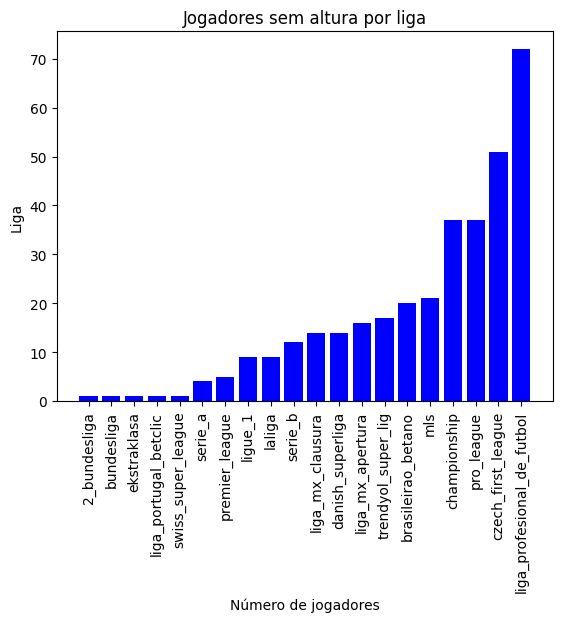

In [40]:
generic_bar_graph(categories=grouped_data['tournament'], values=grouped_data['name'], title='Jogadores sem altura por liga', x_label='Número de jogadores', y_label='Liga', x_rotation=90)

In [65]:
grouped_data = df[df['height'].isnull()].groupby(['tournament', 'season'])['minutesPlayed'].max().reset_index().sort_values('minutesPlayed')

In [ ]:
generic_bar_graph(categories=grouped_data['tournament'], values=grouped_data['name'], title='Jogadores sem altura por liga', x_label='Número de jogadores', y_label='Liga', x_rotation=90)

In [66]:
stacked_data = grouped_data.pivot_table(index='season', columns='tournament', values='minutesPlayed')

In [67]:
stacked_data

tournament,2_bundesliga,brasileirao_betano,bundesliga,championship,czech_first_league,danish_superliga,ekstraklasa,laliga,liga_mx_apertura,liga_mx_clausura,liga_portugal_betclic,liga_profesional_de_futbol,ligue_1,mls,premier_league,pro_league,serie_a,serie_b,swiss_super_league,trendyol_super_lig
season,,,,,,,,,,,,,,,,,,,,
2023,NaN,258.0,NaN,NaN,NaN,NaN,NaN,NaN,246.0,891.0,NaN,996.0,NaN,1547.0,NaN,NaN,NaN,NaN,NaN,NaN
2024,NaN,687.0,NaN,NaN,NaN,NaN,NaN,NaN,306.0,376.0,NaN,1156.0,NaN,2793.0,NaN,NaN,NaN,NaN,NaN,NaN
22_23,NaN,NaN,NaN,536.0,1023.0,31.0,NaN,9.0,NaN,NaN,70.0,NaN,55.0,NaN,14.0,1413.0,15.0,31.0,NaN,69.0
23_24,11.0,NaN,22.0,2596.0,1749.0,2511.0,8.0,259.0,NaN,NaN,NaN,NaN,212.0,NaN,12.0,570.0,14.0,106.0,8.0,169.0


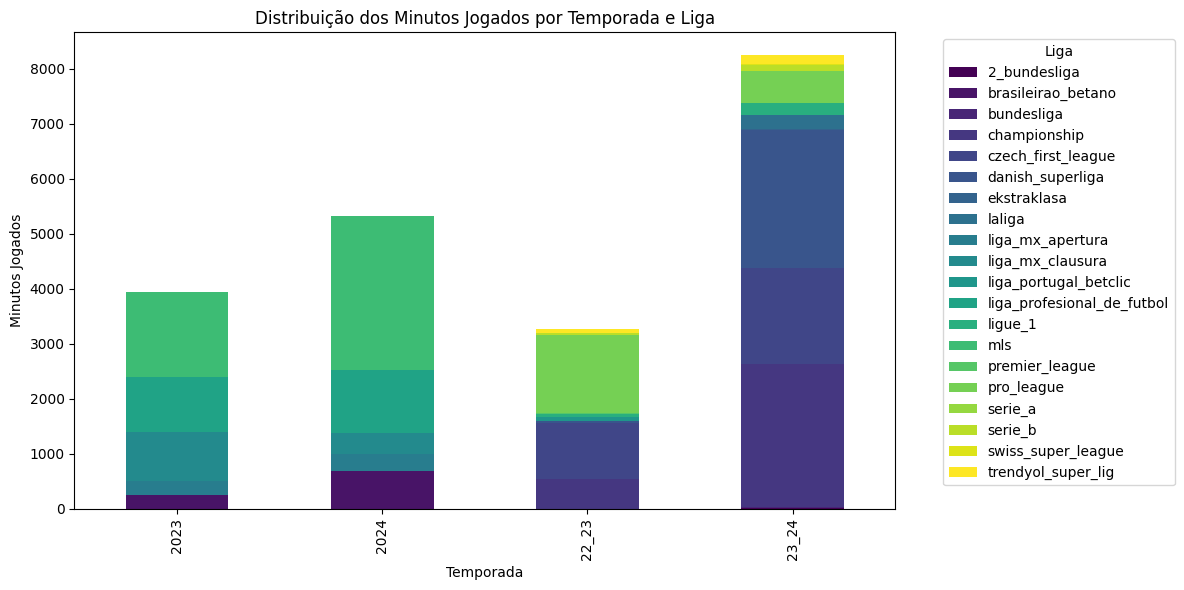

In [68]:
import matplotlib.pyplot as plt

stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")

# Personalizar o gráfico
plt.title('Distribuição dos Minutos Jogados por Temporada e Liga')
plt.xlabel('Temporada')
plt.ylabel('Minutos Jogados')
plt.legend(title='Liga', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### preferredFoot

Parece que ocorreu um problema na coleta destes dados. Apenas para estes jogadores, vou refazer as coletas de dados ou posso inserir a moda nessa caso

In [72]:
df[df['preferredFoot'].isnull()][['tournament', 'season', 'name', 'player_id']]

,tournament,season,name,player_id
66,2_bundesliga,23_24,Pascal Klemens,1409353
128,2_bundesliga,23_24,Ilyas Ansah,1462742
145,2_bundesliga,23_24,Stefano Marino,1167764
266,2_bundesliga,23_24,Max Weiss,1128801
444,2_bundesliga,23_24,Jan Reichert,1064986
...,...,...,...,...
22440,pro_league,22_23,Gerard Vandeplas,1426634
22529,pro_league,22_23,Milan Govaers,1427477
22545,pro_league,22_23,Noah Serwy,1134417
22616,pro_league,22_23,Denys Bunchukov,1395863


### retired and deceased

Alguns jogadores realmente não tem essa informação. Estes serão considerados jogadores normais

In [75]:
df[df['deceased'].isnull()][['tournament', 'season', 'name', 'player_id']]

,tournament,season,name,player_id
0,2_bundesliga,23_24,Manuel Feil,814221
2,2_bundesliga,23_24,Carlo Sickinger,845653
3,2_bundesliga,23_24,Terrence Boyd,50968
4,2_bundesliga,23_24,Andi Hoti,1000541
5,2_bundesliga,23_24,Daniel Ginczek,48022
...,...,...,...,...
22721,pro_league,22_23,Valentin Guillaume,1134596
22723,pro_league,22_23,Loïc Lapoussin,902987
22724,pro_league,22_23,Jacob Barrett Laursen,149592
22725,pro_league,22_23,Casper Nielsen,247471


### Jogadores que não jogaram nenhum minuto na temporada

In [ ]:
len(df[df['minutesPlayed'] == 0])

16

### Jogadores aposentados

In [ ]:
len(df[df['retired'] == True])

431

## Identificando valores nulos - Estatisticas dos jogadores

In [89]:
df.iloc[:,22:].info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22727 entries, 0 to 22726
Data columns (total 112 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    rating                        22727 non-null  float64
 1    totalRating                   22727 non-null  float64
 2    countRating                   22727 non-null  int64  
 3    goals                         22727 non-null  int64  
 4    bigChancesCreated             22727 non-null  int64  
 5    bigChancesMissed              22727 non-null  int64  
 6    assists                       22475 non-null  float64
 7    goalsAssistsSum               22727 non-null  int64  
 8    accuratePasses                22727 non-null  int64  
 9    inaccuratePasses              22727 non-null  int64  
 10   totalPasses                   22727 non-null  int64  
 11   accuratePassesPercentage      22727 non-null  float64
 12   accurateOwnHalfPasses         22727 non-null

### assists

Realmente parece que alguns jogadores não tem essa característica computada. Vou preencher esses valores faltantes na etapa de pré-processamento

In [91]:
df[df['assists'].isnull()]['position'].value_counts()

position
D    83
M    83
F    46
G    40
Name: count, dtype: int64

In [97]:
df[df['assists'].isnull()].head(5)

,positive,negative,positions,heatmap,matches,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals,age
18352,[],[],['GK'],"[{'x': 5, 'y': 68, 'count': 1}, {'x': 5, 'y': ...",3.0,"{'name': 'Viktoria Plzeň', 'slug': 'viktoria-p...",22_23,czech_first_league,Marián Tvrdoň,G,194.0,Right,345000.0,1.782778e+09,Viktoria Plzeň,1. Liga,Czech Republic,Czechia,772347,NaN,7.771680e+08,NaN,7.066667,21.2,3,0,0,0,NaN,0,44,28,72,61.111111,30,14,7,0,0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.000000,1,100.0,1,100.000000,197,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,20,41.666667,3,0,0,0,28,0,6,4,100,0,0,0,0.0,0,0,0,0,8,1,0,0,5,3,2,0,1,2,2,2,0,3,0.0,0.0,0,0,0,0,0,0,0,0,48,2,0,0.0,0.0,0.0,0,1,34,38,0,NaN,NaN,1031693,overall,3,NaN,NaN,NaN,30.0
18354,[],[],['GK'],"[{'x': 14, 'y': 75, 'count': 1}, {'x': 14, 'y'...",13.0,"{'name': 'SK Sigma Olomouc', 'slug': 'sk-sigma...",22_23,czech_first_league,Matúš Macík,G,198.0,Right,190000.0,1.751242e+09,Slovan,Niké Liga,Slovakia,Slovakia,799087,NaN,7.377696e+08,NaN,6.784615,88.2,13,0,0,0,NaN,0,205,169,374,54.812834,149,56,24,0,1,100.0,1,1,2,0,0.0,0,0.0,0,0,0,3,75.000000,1,100.0,4,80.000000,1170,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,89,34.765625,14,1,0,0,175,0,92,32,518,1,1,0,0.0,0,0,0,0,41,3,2,1,27,14,18,3,6,0,0,15,0,13,0.0,0.0,0,1,0,1,0,0,0,0,256,21,1,100.0,0.0,0.0,1,7,168,206,0,NaN,NaN,1031734,overall,13,NaN,NaN,NaN,31.0
18356,[],[],['ST'],"[{'x': 65, 'y': 8, 'count': 1}, {'x': 42, 'y':...",7.0,"{'name': 'SK Sigma Olomouc', 'slug': 'sk-sigma...",22_23,czech_first_league,Denis Kramář,F,185.0,NaN,185000.0,1.782778e+09,Sigma Olomouc,1. Liga,Czech Republic,Czechia,1093979,NaN,1.060301e+09,False,6.560000,32.8,5,0,0,0,NaN,0,12,8,20,60.000000,3,9,6,0,1,100.0,3,1,1,0,0.0,0,0.0,1,1,0,8,40.000000,0,0.0,8,34.782609,128,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,50.000000,1,0,0,5,21,1,1,0,52,4,8,0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.0,0.0,0,1,1,15,3,0,0,0,2,2,3,100.0,0.0,0.0,0,0,4,17,0,NaN,NaN,1032417,overall,7,NaN,NaN,NaN,21.0
18357,[],[],['ST'],"[{'x': 85, 'y': 90, 'count': 1}, {'x': 85, 'y'...",7.0,"{'name': 'SK Sigma Olomouc', 'slug': 'sk-sigma...",22_23,cze

### goalKicks

Não sei se essa variável é tão util. Relacionada ao número de tiros de meta de um jogador. Grande maioria não tem por que não bate tiro de meta

In [108]:
df[(df['goalKicks'] > 0)][['tournament', 'season', 'name', 'player_id' ,'goalKicks']].head(5)

,tournament,season,name,player_id,goalKicks
2,2_bundesliga,23_24,Carlo Sickinger,845653,5.0
4,2_bundesliga,23_24,Andi Hoti,1000541,1.0
9,2_bundesliga,23_24,Robert Kwasigroch,1211829,3.0
11,2_bundesliga,23_24,Frederik Jäkel,987479,8.0
19,2_bundesliga,23_24,Marcel Franke,121793,12.0


In [106]:
df[(df['goalKicks'] > 0) & (df['position'] == 'G')][['tournament', 'season', 'name', 'goalKicks']].head(5)

,tournament,season,name,goalKicks
9,2_bundesliga,23_24,Robert Kwasigroch,3.0
26,2_bundesliga,23_24,Marius Müller,150.0
30,2_bundesliga,23_24,Pelle Boevink,126.0
48,2_bundesliga,23_24,Florian Kastenmeier,183.0
68,2_bundesliga,23_24,Matheo Raab,69.0


In [100]:
df[~df['goalKicks'].isnull()].head(5)

,positive,negative,positions,heatmap,matches,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals,age
0,[],[],"['MR', 'RW']","[{'x': 30, 'y': 10, 'count': 1}, {'x': 30, 'y'...",34.0,"{'name': 'SV 07 Elversberg', 'slug': 'sv-07-el...",23_24,2_bundesliga,Manuel Feil,M,169.0,Right,420000.0,1.782778e+09,Elversberg,Regionalliga Southwest,Germany Amateur,Germany,814221,NaN,7.815744e+08,NaN,6.761765,229.9,34,3,2,4,1.0,4,456,154,610,74.754098,149,311,204,23,10,43.478261,49,11,4,0,0.0,4,26.666667,36,10,17,83,52.866242,20,44.444444,103,50.990099,2158,8.333333,0,0.0,0,0,0,0,3,0,25,11,1,1,1,4,18.181818,28,0,0,15,242,15,36,20,952,24,17,1,0.0,30,5,9,0,0,0,0,0,0,0,40,4,0,0,0,0,0,25,0.0,0.0,23,23,15,99,25,0,0,0,22,44,28,57.142857,719.333333,0.0,0,0,185,440,0,0.0,87.0,1051716,overall,34,NaN,NaN,NaN,30.0
1,[],[],[],"[{'x': 72, 'y': 7, 'count': 1}, {'x': 72, 'y':...",1.0,"{'name': 'SC Paderborn 07', 'slug': 'sc-paderb...",23_24,2_bundesliga,Marco Pledl,M,173.0,Both,160000.0,1.751242e+09,Paderborn II,Oberliga Westfalen,Germany Amateur,Germany,1085304,False,9.766656e+08,False,6.500000,6.5,1,0,0,0,0.0,0,7,1,8,87.500000,5,2,1,0,0,0.000000,2,0,1,0,0.0,0,0.000000,0,0,0,2,50.000000,0,0.000000,2,50.000000,62,0.000000,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,5,0,0,0,14,0,2,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0.0,0,0,4,2,0,0,0,0,0,1,1,50.000000,0.000000,0.0,0,0,5,7,0,0.0,1.0,1348766,overall,1,NaN,NaN,NaN,24.0
2,"[{'type': 25, 'rank': 271}, {'type': 15, 'rank...",[],"['DC', 'MC', 'DM']","[{'x': 28, 'y': 51, 'count': 2}, {'x': 28, 'y'...",25.0,"{'name': 'SV 07 Elversberg', 'slug': 'sv-07-el...",23_24,2_bundesliga,Carlo Sickinger,M,182.0,Both,725000.0,1.814314e+09,Elversberg,Regionalliga Southwest,Germany Amateur,Germany,845653,NaN,8.701344e+08,NaN,6.940000,173.5,25,2,2,1,0.0,2,1056,235,1291,81.797057,727,329,107,10,6,60.000000,46,48,10,0,0.0,0,0.000000,16,3,9,78,63.414634,42,54.545455,120,60.000000,2056,12.500000,1,1.0,0,2,0,0,2,0,9,7,0,0,2,149,51.379310,98,0,1,2,270,1,201,98,1636,27,24,1,0.0,16,0,4,0,0,2,0,0,0,0,40,3,0,0,0,0,0,25,100.0,0.0,10,10,6,80,3

### ballRecovery e goalsPrevented

Talvez seja uma estatistica que não guardam muito. Nem todo jogador deve ter esse tipo de ação no jogo

### expectedAssists e expectedGoals

Aparentemente, nem todos os jogadores tem essa estatística calculada. Melhor analisar uma estratética para imputar isso no pré-processamento

In [124]:
df[df['expectedAssists'].isnull()][['tournament', 'season', 'player_id', 'name']].head()

,tournament,season,player_id,name
0,2_bundesliga,23_24,814221,Manuel Feil
1,2_bundesliga,23_24,1085304,Marco Pledl
2,2_bundesliga,23_24,845653,Carlo Sickinger
3,2_bundesliga,23_24,50968,Terrence Boyd
4,2_bundesliga,23_24,1000541,Andi Hoti


In [125]:
df[(df['expectedAssists'].isnull()) & (df['assists'] > 0)][['tournament', 'season', 'player_id', 'name']]

,tournament,season,player_id,name
0,2_bundesliga,23_24,814221,Manuel Feil
3,2_bundesliga,23_24,50968,Terrence Boyd
6,2_bundesliga,23_24,122010,Saulo Decarli
7,2_bundesliga,23_24,944288,Florian Flick
11,2_bundesliga,23_24,987479,Frederik Jäkel
...,...,...,...,...
22714,pro_league,22_23,1388434,Nachon Nsingi
22715,pro_league,22_23,798790,Martin Regáli
22718,pro_league,22_23,914877,Fraser Hornby
22722,pro_league,22_23,889378,Nicolas Raskin


In [117]:
len(df[df['expectedAssists'].isnull()]['tournament'].unique())

19

In [118]:
len(df[df['expectedGoals'].isnull()]['tournament'].unique())

20

In [121]:
grouped_data = grouped_data = df[df['expectedAssists'].isnull()].groupby(['tournament'])['minutesPlayed'].max().reset_index().sort_values('minutesPlayed')

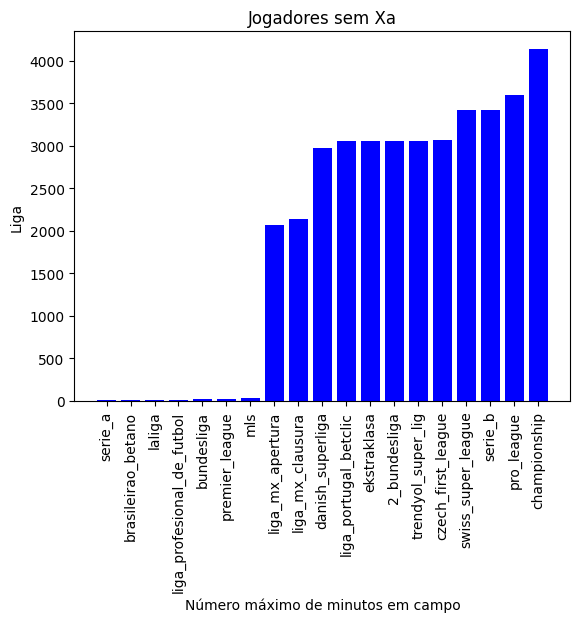

In [122]:
generic_bar_graph(categories=grouped_data['tournament'], values=grouped_data['minutesPlayed'], title='Jogadores sem Xa', x_label='Número máximo de minutos em campo', y_label='Liga', x_rotation=90)

In [126]:
grouped_data = grouped_data = df[df['expectedAssists'].isnull()].groupby(['tournament'])['assists'].max().reset_index().sort_values('assists')

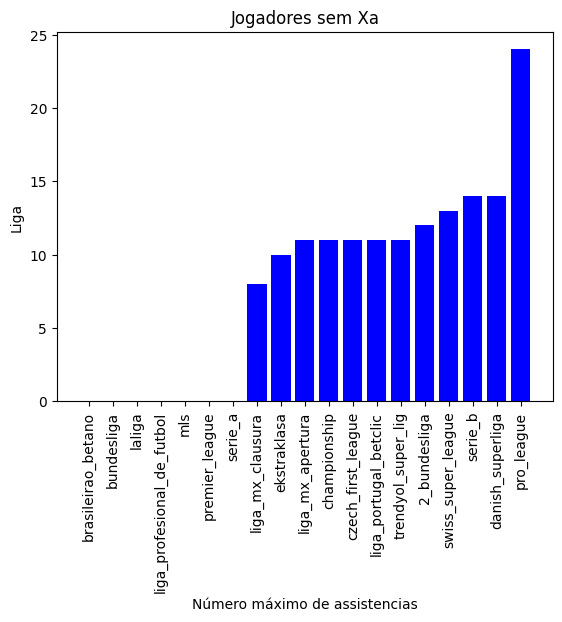

In [127]:
generic_bar_graph(categories=grouped_data['tournament'], values=grouped_data['assists'], title='Jogadores sem Xa', x_label='Número máximo de assistencias', y_label='Liga', x_rotation=90)

In [130]:
df[(df['expectedAssists'].isnull()) & (df['assists'] > 20)][['tournament', 'season', 'player_id', 'name', 'assists']]

,tournament,season,player_id,name,assists
22298,pro_league,22_23,826183,Mike Trésor,24.0


## Analisando distribuição e outliers de variáveis dos jogadores

In [222]:
df_player_characteristics = df[['heatmap','matches', 'season', 'tournament', 'name', 'position', 'height', 
 'preferredFoot', 'proposedMarketValue', 'contractUntilTimestamp', 
 'current_team', 'current_team_tournament', 'current_team_tournament_category', 
 'current_team_country', 'player_id', 'retired', 'age', 
 'deceased', 'season_team', 'season_team_shortname']].copy()

In [223]:
df_player_characteristics = df_player_characteristics[
    ((df_player_characteristics['deceased'].isnull()) | (df_player_characteristics['deceased'] == False))
    &
    (~df_player_characteristics['heatmap'].isnull())
    &
    (~df_player_characteristics['position'].isnull())
    &
    (~df_player_characteristics['age'].isnull())
]

In [224]:
df_player_characteristics.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 22600 entries, 0 to 22726
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   heatmap                           22600 non-null  object 
 1   matches                           22600 non-null  float64
 2   season                            22600 non-null  object 
 3   tournament                        22600 non-null  object 
 4   name                              22600 non-null  object 
 5   position                          22600 non-null  object 
 6   height                            22296 non-null  float64
 7   preferredFoot                     21588 non-null  object 
 8   proposedMarketValue               21684 non-null  float64
 9   contractUntilTimestamp            18579 non-null  float64
 10  current_team                      22600 non-null  object 
 11  current_team_tournament           21195 non-null  object 
 12  current_t

Das variáveis acima, o que eu acho que pode ser interessante para o modelo:

- heatmap
- matches
- position
- height
- preferredFoot
- age

In [155]:
df_player_characteristics = df_player_characteristics[['matches', 'position', 'height', 'preferredFoot', 'age']].copy()

#### Analisando quantos jogadores estão com dados em duas temporadas

In [226]:
df_two_seasons = df.groupby(['name', 'season_team'])['season'].count().reset_index()

In [228]:
df_two_seasons

,name,season_team,season
0,Aaron Akale,Basel,1
1,Aaron Anselmino,Boca Juniors,2
2,Aaron Appindangoyé,Sivasspor,2
3,Aaron Basenach,1. FC Kaiserslautern,1
4,Aaron Bibout,LA Galaxy,1
...,...,...,...
16938,Žan Rogelj,RC Sporting Charleroi,1
16939,Žan Zaletel,Viborg FF,2
16940,Žan Žužek,Bari,2
16941,Živko Kostadinović,FC Zürich,1


In [245]:
df_two_seasons = df.groupby(['player_id', 'season'])['name'].count().reset_index()

In [238]:
players_one_season = df_two_seasons[df_two_seasons['season'] == 1]['player_id'].unique()

In [241]:
len(df_player_characteristics[df_player_characteristics['player_id'].isin(players_one_season)])

12934

In [227]:
df_two_seasons['season'].value_counts()

season
1    11589
2     5058
3      162
4      134
Name: count, dtype: int64

In [231]:
df_two_seasons[df_two_seasons['season'] == 4]['season_team'].unique()

array(['Club León', 'Club Necaxa', 'CD Guadalajara', 'Club Puebla',
       'Santos Laguna', 'Atlas FC', 'Club América', 'Cruz Azul',
       'Tigres UANL', 'Atlético San Luis', 'Club Tijuana', 'CD Toluca',
       'Mazatlán FC', 'CF Pachuca', 'Pumas UNAM', 'FC Juárez',
       'CF Monterrey', 'Querétaro FC'], dtype=object)

In [163]:
df[df['name'] == 'Paulinho']

,positive,negative,positions,heatmap,matches,team,season,tournament,name,position,height,preferredFoot,proposedMarketValue,contractUntilTimestamp,current_team,current_team_tournament,current_team_tournament_category,current_team_country,player_id,retired,dateOfBirthTimestamp,deceased,rating,totalRating,countRating,goals,bigChancesCreated,bigChancesMissed,assists,goalsAssistsSum,accuratePasses,inaccuratePasses,totalPasses,accuratePassesPercentage,accurateOwnHalfPasses,accurateOppositionHalfPasses,accurateFinalThirdPasses,keyPasses,successfulDribbles,successfulDribblesPercentage,tackles,interceptions,yellowCards,directRedCards,redCards,accurateCrosses,accurateCrossesPercentage,totalShots,shotsOnTarget,shotsOffTarget,groundDuelsWon,groundDuelsWonPercentage,aerialDuelsWon,aerialDuelsWonPercentage,totalDuelsWon,totalDuelsWonPercentage,minutesPlayed,goalConversionPercentage,penaltiesTaken,penaltyGoals,penaltyWon,penaltyConceded,shotFromSetPiece,freeKickGoal,goalsFromInsideTheBox,goalsFromOutsideTheBox,shotsFromInsideTheBox,shotsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,accurateLongBalls,accurateLongBallsPercentage,clearances,errorLeadToGoal,errorLeadToShot,dispossessed,possessionLost,possessionWonAttThird,totalChippedPasses,accurateChippedPasses,touches,wasFouled,fouls,hitWoodwork,ownGoals,dribbledPast,offsides,blockedShots,passToAssist,saves,cleanSheet,penaltyFaced,penaltySave,savedShotsFromInsideTheBox,savedShotsFromOutsideTheBox,goalsConcededInsideTheBox,goalsConcededOutsideTheBox,punches,runsOut,successfulRunsOut,highClaims,crossesNotClaimed,matchesStarted,penaltyConversion,setPieceConversion,totalAttemptAssist,totalContest,totalCross,duelLost,aerialLost,attemptPenaltyMiss,attemptPenaltyPost,attemptPenaltyTarget,totalLongBalls,goalsConceded,tacklesWon,tacklesWonPercentage,scoringFrequency,yellowRedCards,savesCaught,savesParried,totalOwnHalfPasses,totalOppositionHalfPasses,totwAppearances,goalKicks,ballRecovery,id,type,appearances,goalsPrevented,expectedAssists,expectedGoals,age
3913,"[{'type': 5, 'rank': 164}, {'type': 25, 'rank'...",[],['ST'],"[{'x': 49, 'y': 49, 'count': 1}, {'x': 49, 'y'...",19.0,"{'name': 'CD Toluca', 'slug': 'deportivo-toluc...",2024,liga_mx_apertura,Paulinho,F,187.0,Left,7300000.0,1.814314e+09,Toluca,"Liga MX, Clausura",Mexico,Mexico,205790,False,7.212672e+08,False,7.468421,141.9,19,13,8,9,5.0,18,236,96,332,71.084337,106,132,67,17,5,27.777778,9,3,2,0,0.0,2,66.666667,56,30,20,36,37.500000,30,53.571429,66,43.421053,1613,23.214286,1,0.0,0,0,0,0,12,1,50,6,3,6,4,20,83.333333,20,0,0,15,163,10,15,11,546,22,30,0,0.0,5,17,6,0,0,3,0,0,0,0,18,1,0,0,0,0,0,18,0.0,0.0,17,18,3,86,26,0,0,1,24,19,6,66.666667,124.076923,0.0,0,0,122,213,3,0.0,33.0,1427971,overall,19,NaN,NaN,NaN,32.0
8314,[],[],[],NaN,NaN,"{'name': 'Vasco da Gama', 'slug': 'vasco-da-ga...",2023,brasileirao_betano,Paulinho,D,172.0,Right,365000.0,1.751242e+09,Vasco U20,U20 Brasileiro,Brazil,Brazil,1464309,NaN,1.116806e+09,False,6.100000,6.1,1,0,0,0,0.0,0,27,4,31,87.096774,6,23,5,3,0,0.000000,0,0,0,0,0.0,2,66.666667,2,0,1,3,50.000000,0,0.000000,3,50.000000,45,0.000000,0,0.0,0,1,0,0,0,0,1,1,0,0,0,2,66.666667,0,0,0,1,7,1,1,0,42,3,1,0,0.0,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0.0,0.0,3,0,3,3,0,0,0,0,3,2,0,0.000000,0.000000,0.0,0,0,8,26,0,NaN,NaN,1053261,overall,1,NaN,0.105576,0.0433,19.0
8419,"[{'type': 25, 'rank': 230}, {'type': 6, 'rank'...",[],"['ST', 'LW']","[{'x': 22, 'y': 64, 'count': 1}, {'x': 22, 'y'...",36.0,"{'name': 'Atlético Mineiro', 'slug': 'atletico...",2023,brasileirao_betano,Paulinho,F,175.0,Right,16399999.0,1.893370e+09,Palmeiras,Brasileirão Betano,Brazil,Brazil,885179,False,9.636192e+08,NaN,7.150000,257.4,36,20,3,15,2.0,22,847,174,1021,82.957884,261,590,334,36,52,52.525253,43,17,3,0,0.0,4,21.052632,90,48,23,118,48.760331,25,43.859649,143,47.826087,3001,22.222222,0,0.0,0,0,0,0,19,1,78,12,2,6,12,19,82.608696,17,0,0,38,375,21,33,22,1555,24,21,1,0.0,19,11,19,0,0,4,0,0,0,0,22,4,0,0,0,0,0,35,0.0,0.0,36,99,19,156,32,0,0,0,23,26,31,72.0930

# Pré-processamento

O que posso fazer até aqui?

- Remover jogadores aposentados, falecidos e com poucos stats (olhar as análises de heatmap, position, age, matches e jogadores falecidos)
- Classificar qual tipo de jogador com base nas posições que ele ocupa
- Adicionar a altura em jogadores que não tem
- Inserir a moda para jogadores sem o pé preferencial